In [1]:
import pandas as pd
df = pd.read_csv("ilmaandmed_näidis.csv")
print(df.head())  # millised veerud on olemas

      kuupäev kellaaeg  temperatuur  õhuniiskus  tuule_kiirus tuule_suund  \
0  2024-01-15    00:00          2.5          85            12          SW   
1  2024-01-15    01:00          2.1          87            11          SW   
2  2024-01-15    02:00          1.8          89            10          SW   
3  2024-01-15    03:00          1.5          91             9          SW   
4  2024-01-15    04:00          1.2          93             8          SW   

   atmosfääri_rõhk  sademed  
0           1013.2      0.0  
1           1012.8      0.0  
2           1012.5      0.0  
3           1012.1      0.0  
4           1011.8      0.0  


In [ ]:
#Ülesanne 1: Temperatuuri ekstremumid
#Leia ja visualiseeri:

#Kõige kõrgem temperatuur - millal ja mis temperatuur?
#Kõige madalam temperatuur - millal ja mis temperatuur?
#Temperatuuri vahe - kui suur on erinevus kõrgeima ja madalaima vahel?
#Temperatuuri kõikumine - millal oli temperatuur kõige stabiilsem (väikseim standardhälve)?

In [10]:
print("kõrgeim temperatuur:", df["temperatuur"].max())
row = df.loc[df["temperatuur"].idxmax()]
print("Kõige kõrgem temperatuur oli", row["temperatuur"], "kuupäeval", row["kuupäev"])

kõrgeim temperatuur: 7.5
Kõige kõrgem temperatuur oli 7.5 kuupäeval 2024-01-15 00:00:00


In [3]:
print("Madalaim temperatuur:", df["temperatuur"].min())
row = df.loc[df["temperatuur"].idxmin()]
print("Kõige madalam temperatuur oli", row["temperatuur"], row["kuupäev"], "kuupäeval" )

Madalaim temperatuur: -2.0
Kõige madalam temperatuur oli -2.0 2024-01-21 kuupäeval


In [4]:
# kõrgeim temperatuur
max_temp = df["temperatuur"].max()

# madalaim temperatuur
min_temp = df["temperatuur"].min()

# vahe
diff = max_temp - min_temp

print("Kõige kõrgem temperatuur:", max_temp)
print("Kõige madalam temperatuur:", min_temp)
print("Temperatuuri vahe:", diff)

Kõige kõrgem temperatuur: 7.5
Kõige madalam temperatuur: -2.0
Temperatuuri vahe: 9.5


In [6]:
std = df['temperatuur'].std()
print("Temperatuuride standardhälve on: ", std)

Temperatuuride standardhälve on:  2.556184458306436


In [7]:
# muudan kuupäeva datetime-ks
df["kuupäev"] = pd.to_datetime(df["kuupäev"])

In [8]:
# standardhälve päevade kaupa
paeva_std = df.groupby(df["kuupäev"].dt.date)["temperatuur"].std()
# kõige väiksem standardhälve päevadest
stab_day = paeva_std.idxmin()
stab_value = paeva_std.min()
print("Kõige stabiilsem temperatuur oli kuupäeval:", stab_day, 
      "standardhälbega", round(stab_value, 2))

Kõige stabiilsem temperatuur oli kuupäeval: 2024-01-15 standardhälbega 2.32


In [ ]:
#Ülesanne 2: Tuule analüüs
#Analüüsi tuule andmeid:

#Tuule suundade jaotus - milline tuule suund on kõige tavalisem?
#Tuule kiiruse ja temperatuuri seos - kas tugev tuul mõjutab temperatuuri?
#Tuule kiiruse trend - kas tuul tugevneb või nõrgeneb aja jooksul?
#Tuule kiiruse histogramm - kuidas jaotub tuule kiirus?

In [11]:
#Enim esinenud tuulesuund
tuulesuund_dir = df["tuule_suund"].mode()[0]
print("Enim esinenud tuulesuund oli:", tuulesuund_dir)

Enim esinenud tuulesuund oli: SW


In [13]:
#Tuule kiiruse ja temperatuuri korrelatsioon
corr=df['tuule_kiirus'].corr(df['temperatuur'])
print("Korrelatsioon tuule kiiruse ja temperatuuri vahel:", round(corr, 2))
# Kas tugevam tuul kaasneb kõrgema temperatuuriga? Jah

Korrelatsioon tuule kiiruse ja temperatuuri vahel: 0.68


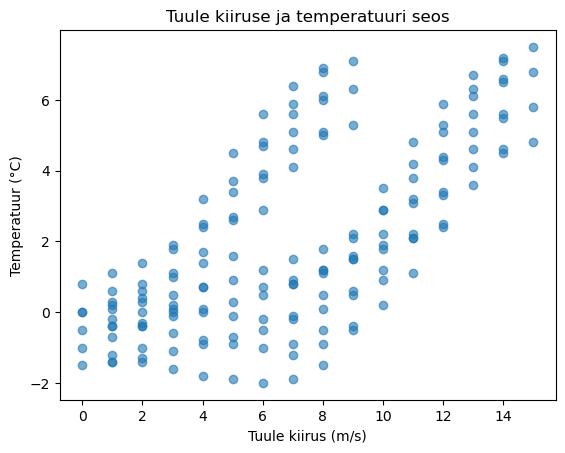

In [14]:
# Tuule kiiruse ja temperatuuri seos - hajuvusdiagramm
import matplotlib.pyplot as plt

plt.scatter(df["tuule_kiirus"], df["temperatuur"], alpha=0.6)
plt.title("Tuule kiiruse ja temperatuuri seos")
plt.xlabel("Tuule kiirus (m/s)")
plt.ylabel("Temperatuur (°C)")
plt.show()

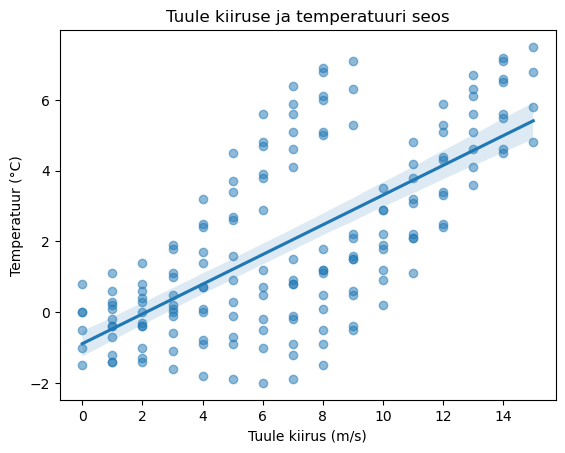

In [16]:
#Tuule kiiruse ja temperatuuri seos - joondiagrammiga
import seaborn as sns

sns.regplot(x="tuule_kiirus", y="temperatuur", data=df, scatter_kws={"alpha":0.5})
plt.title("Tuule kiiruse ja temperatuuri seos")
plt.xlabel("Tuule kiirus (m/s)")
plt.ylabel("Temperatuur (°C)")
plt.show()

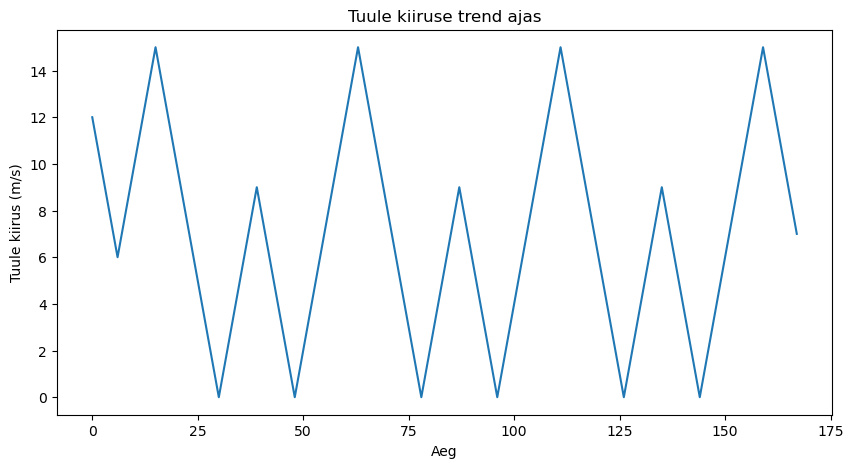

In [17]:
#Tuule kiirus aja suhtes
import matplotlib.pyplot as plt

df["tuule_kiirus"].plot(figsize=(10,5))
plt.title("Tuule kiiruse trend ajas")
plt.xlabel("Aeg")
plt.ylabel("Tuule kiirus (m/s)")
plt.show()

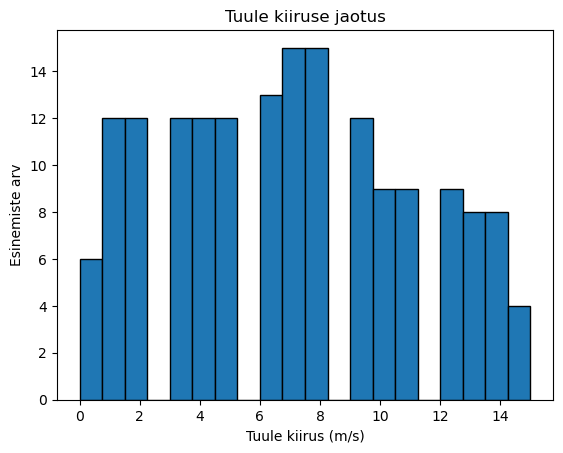

In [18]:
# Lihtne histogramm – matplotlib’iga
import matplotlib.pyplot as plt

plt.hist(df["tuule_kiirus"], bins=20, edgecolor="black")
plt.title("Tuule kiiruse jaotus")
plt.xlabel("Tuule kiirus (m/s)")
plt.ylabel("Esinemiste arv")
plt.show()

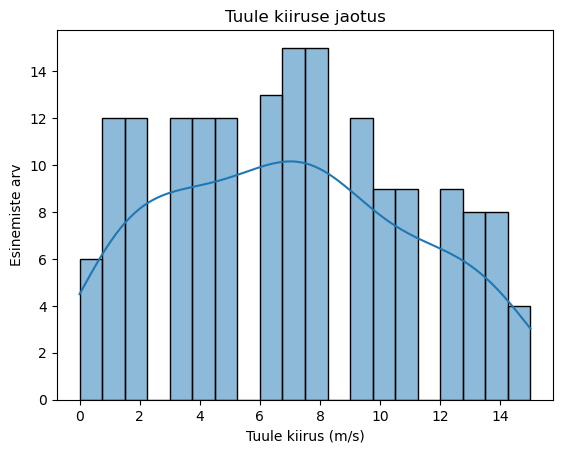

In [19]:
# Joonega histogramm 
import seaborn as sns

sns.histplot(df["tuule_kiirus"], bins=20, kde=True)
plt.title("Tuule kiiruse jaotus")
plt.xlabel("Tuule kiirus (m/s)")
plt.ylabel("Esinemiste arv")
plt.show()

In [20]:
# min, max, keskmine tuulekiirus ja standardhälve
print(df["tuule_kiirus"].describe())

count    168.000000
mean       6.928571
std        4.120304
min        0.000000
25%        3.750000
50%        7.000000
75%       10.000000
max       15.000000
Name: tuule_kiirus, dtype: float64


In [ ]:
#Ülesanne 3: Päevade võrdlus
#Võrdle erinevaid päevi:

#Kõige soojem päev - millal oli kõige kõrgem keskmine temperatuur?
#Kõige niiskem päev - millal oli kõige kõrgem õhuniiskus?
#Kõige tuulisem päev - millal puhus kõige tugevamalt?
#Päevade võrdlusgraafik - tee graafik, mis näitab kõiki päevi kõrvuti

In [27]:
# Päevade keskmised temperatuurid
daily_mean = df["temperatuur"], df["temperatuur"].mean()
print("Päevade keskmised temperatuurid",daily_mean)





Päevade keskmised temperatuurid (0      2.5
1      2.1
2      1.8
3      1.5
4      1.2
      ... 
163    1.1
164    0.2
165   -0.5
166   -0.9
167   -1.2
Name: temperatuur, Length: 168, dtype: float64, np.float64(2.020238095238095))


In [31]:
# Kõige soojem päev
daily_mean = df.groupby('kuupäev')['temperatuur'].mean()  # ainult keskmised
soojem_päev = daily_mean.idxmax()  
kõrgeim_temp = daily_mean.max()    
print("Kõige soojem päev oli kuupäeval:", soojem_päev.date(), "keskmise temperatuuriga", round(kõrgeim_temp, 1), "°C")

Kõige soojem päev oli kuupäeval: 2024-01-15 keskmise temperatuuriga 3.4 °C


In [33]:
# Päevade keskmine õhuniiskus
keskm_õhuniiskus = df["õhuniiskus"], df["õhuniiskus"].mean()
print("Päevade keskmine õhuniiskus",keskm_õhuniiskus)

Päevade keskmine õhuniiskus (0      85
1      87
2      89
3      91
4      93
       ..
163    87
164    90
165    92
166    94
167    96
Name: õhuniiskus, Length: 168, dtype: int64, np.float64(89.74404761904762))


In [35]:
# Kõige niiskem päev
daily_mean_n = df.groupby('kuupäev')['õhuniiskus'].mean()  # ainult keskmised
niiskeim_päev = daily_mean_n.idxmax()    
niiskuse_protsent = daily_mean_n.max()     
print("Kõige niiskem päev oli:", niiskeim_päev.date(), 
      "keskmise õhuniiskusega", round(niiskuse_protsent, 1), "%")

Kõige niiskem päev oli: 2024-01-16 keskmise õhuniiskusega 90.6 %


In [36]:
# Kõige tuulisem päev
päeva_tuul = df.groupby('kuupäev')["tuule_kiirus"].mean()
tuuliseim_päev = päeva_tuul.idxmax()   
tuule_väärtus = päeva_tuul.max()    
print("Kõige tuulisem päev oli:",tuuliseim_päev.date(), 
      "keskmise tuule kiirusega", round(tuule_väärtus, 1), "m/s")

Kõige tuulisem päev oli: 2024-01-15 keskmise tuule kiirusega 10.2 m/s


In [ ]:
#Ülesanne 4: Andmete eksportimine ja kokkuvõte
#Loo lõplik analüüs:

#Kokkuvõtte tabel - tee tabel, mis näitab kõiki olulisi statistikasid
#Ekspordi tulemused - salvesta analüüsi tulemused eraldi failidesse
#Loo aruanne - kirjuta lühike tekst, mis kirjeldab ilmaandmete põhitendeid
#Soovitused - mida võiks veel analüüsida?

In [44]:
import pandas as pd

# Väärtused, mida on juba arvutatud
max_temp_row = df.loc[df["temperatuur"].idxmax()]
min_temp_row = df.loc[df["temperatuur"].idxmin()]

stab_day = paeva_std.idxmin()
stab_value = paeva_std.min()

daily_mean_temp = df.groupby('kuupäev')['temperatuur'].mean()
soojem_päev = daily_mean_temp.idxmax()
kõrgeim_keskmine_temp = daily_mean_temp.max()

daily_mean_humidity = df.groupby('kuupäev')['õhuniiskus'].mean()
niiskeim_päev = daily_mean_humidity.idxmax()
niiskuse_protsent = daily_mean_humidity.max()

päeva_tuul = df.groupby('kuupäev')["tuule_kiirus"].mean()
tuuliseim_päev = päeva_tuul.idxmax()
tuule_väärtus = päeva_tuul.max()

# Kokkuvõttev tabel
tabel = pd.DataFrame({
    "Kirjeldus": [
        "Kõrgeim temperatuur",
        "Madalaim temperatuur",
        "Kõige stabiilsem temperatuur",
        "Kõige soojem keskmine päev",
        "Kõige niiskem päev",
        "Kõige tuulisem päev"
    ],
    "Kuupäev": [
        max_temp_row["kuupäev"],
        min_temp_row["kuupäev"],
        stab_day,
        soojem_päev,
        niiskeim_päev,
        tuuliseim_päev
    ],
    "Väärtus": [
        max_temp_row["temperatuur"],
        min_temp_row["temperatuur"],
        round(stab_value, 2),
        round(kõrgeim_keskmine_temp, 1),
        round(niiskuse_protsent, 1),
        round(tuule_väärtus, 1)
    ],
    "Ühik": [
        "°C",
        "°C",
        "°C (std)",
        "°C",
        "%",
        "m/s"
    ]
})

print(tabel)
    

                      Kirjeldus              Kuupäev  Väärtus      Ühik
0           Kõrgeim temperatuur  2024-01-15 00:00:00     7.50        °C
1          Madalaim temperatuur  2024-01-21 00:00:00    -2.00        °C
2  Kõige stabiilsem temperatuur           2024-01-15     2.32  °C (std)
3    Kõige soojem keskmine päev  2024-01-15 00:00:00     3.40        °C
4            Kõige niiskem päev  2024-01-16 00:00:00    90.60         %
5           Kõige tuulisem päev  2024-01-15 00:00:00    10.20       m/s


In [ ]:
# Aruanne
#Kõige kõrgema temperatuuriga päev oli 15. jaanuar, mis oli ühtlasi ka kõige stabiilsema temperatuuriga päev 
#ja ka kõige tuulisem päev
#Kõige madalama temperatuuriga päev oli 21. jaanuar.
#Kõige kõrgem õhuniiskus oli 16. jaanuaril